In [ ]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

<font color='red' size='5'>ch01 영상처리 개요</font>

# 1절. 이미지 읽기/쓰기
 - pip install opencv-python : 파이썬용 openCV 설치
 - pip install opencv-contrib-python : 추가 cv 모듈 설치
 - openCV는 numpy 패키지를 필수로 설치해야 함

In [1]:
# ! pip install opencv-contrib-python
# ! pip show opencv-contrib-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(577, 700, 3) (577, 700, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<Figure size 200x100 with 0 Axes>

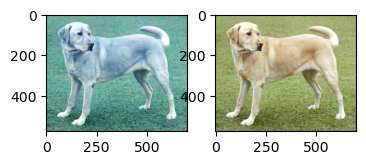

In [11]:
# 이미지 읽어오기
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)
print(type(image_bgr), type(image_rgb))
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [13]:
# 넘파이 배열을 이미지 파일로 저장(폴더가 없으면 False, 결과가 True여야 저장 완료)
cv2.imwrite('data/openCV/bgr.jpg', image_bgr)  # cv2로 저장시 bgr포맷으로 변경된 넘파이를 저장
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


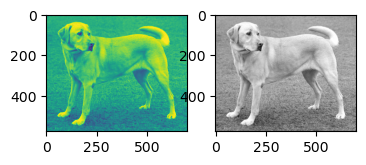

In [17]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)  # gray포맷
image_grgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)  # gray -> rgb
print(image_gray.shape, image_grgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [18]:
# 이미지 저장
cv2.imwrite('data/openCV/gray.jpg', image_gray)
cv2.imwrite('data/openCV/grgb.jpg', image_grgb)

True

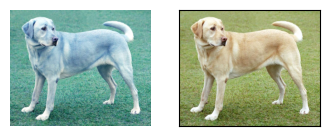

In [27]:
# bgr포맷 이미지의 b, g, r 채널값을 조정해서 rgb포맷으로 변경
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_bgr[:, :, 0]  # b
image_bgr[:, :, 1]  # g
image_bgr[:, :, 2]  # r
b, g, r = cv2.split(image_bgr)  # 2차원
image_rgb = cv2.merge([r, g, b])
fig, axes = plt.subplots(1, 2, figsize=(4, 2))
axes[0].imshow(image_bgr)
axes[0].axis('off')     # 축 생략
axes[1].imshow(image_rgb)
axes[1].set_xticks([])  # x, y축 : 빈 리스트
axes[1].set_yticks([])
plt.show()

# 2절. 도형그리기

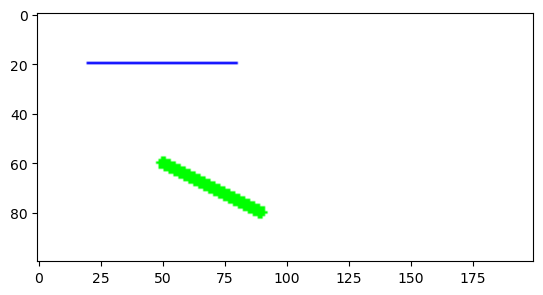

In [44]:
# 선그리기
img = np.full((100, 200, 3),  # 100행200열3차원 배열
              255,            # 배열 안을 채울 값(255:white)
              dtype=np.uint8) # 배열 안 값의 타입이 부호가 없는 정수(unsigned int 8 bit)
cv2.line(img,          # img 위에 line 추가
         (20, 20),     # line 시작점 (x, y)
         (80, 20),     # line 끝점 (x, y)
         (255, 0, 0),  # line 색상 cv2에서는 BGR포맷(저장은 blue)
         1)            # line 굵기
cv2.line(img, (50, 60), (90, 80), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imwrite('data/openCV/line.png', img)
# cv2.imshow('line', img)  # 저장된 파일과 같은 포맷으로 출력
# cv2.waitKey(0)           # 키보드 입력할 때까지 기다리고 입력 시 종료
# cv2.destroyAllWindows()  # openCV 창 모두 닫기

# plt : rgb, openCV : bgr

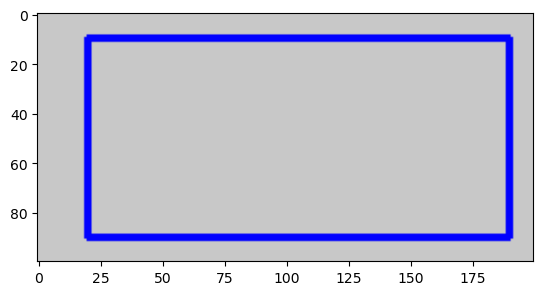

In [45]:
# 사각형 그리기
img = np.full((100, 200, 3), 200, dtype=np.uint8)
cv2.rectangle(img,
              (20, 10),       # 사각형 좌상 좌표
              (190, 90),      # 사각형 우하 좌표
              (255, 0, 0),    # 사각형 색상 BGR포맷
              2)              # 두께
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

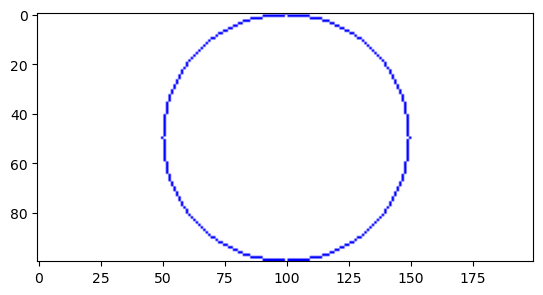

In [46]:
# 원그리기
img = np.full((100, 200, 3), 255, dtype=np.uint8)
cv2.circle(img,
           (100, 50),    # 원 중심점 (x, y)
           50,           # 반지름
           (255, 0, 0))  # 원 색상
           # 원 두께 생략 시 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

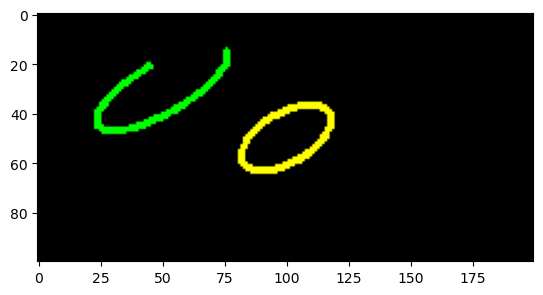

In [53]:
# 호와 타원그리기
img = np.zeros((100, 200, 3), dtype=np.uint8)
# 노란색 타원
cv2.ellipse(img, 
            (100, 50),      # 타원의 중심(x, y)
            (20, 10),       # 두 축의 반지름(가로, 세로)
            -30,            # 회전(-:반시계방향, +:시계방향)
            0, 360,         # 타원의 시작각도~끝각도
            (0, 255, 255),  # 타원 색상
            2)              # 두께
# 초록색 호
cv2.ellipse(img, 
            (50, 30),       # 타원의 중심(x, y)
            (30, 10),       # 두 축의 반지름(가로, 세로)
            -30,            # 회전(-:반시계방향, +:시계방향)
            0, 270,         # 타원의 시작각도~끝각도
            (0, 255, 0),    # 타원 색상
            2)              # 두께
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

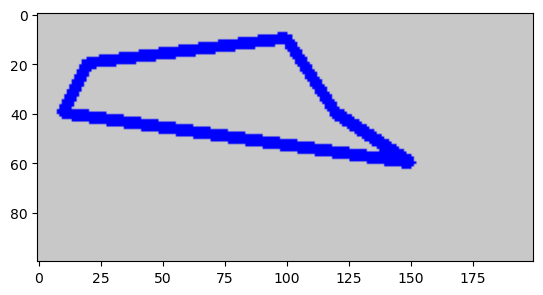

In [58]:
# 다각형그리기
img = np.full((100, 200, 3), 200, dtype=np.uint8)
points = np.array([[10, 40],
                   [20, 20],
                   [100, 10],
                   [120, 40],
                   [150, 60]])  # 꼭짓점 좌표들(x, y)
cv2.polylines(img, 
              [points],     # 꼭짓점 좌표들
              True,         # True:닫힌 다각형, False:열린다각형
              (255, 0, 0),  # 다각형 색상
              3)            # 두께
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(577, 700, 3)


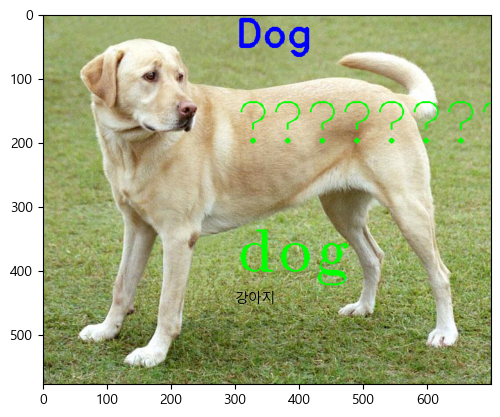

True

In [74]:
# 문자열 표시하기
plt.rc('font', family='Malgun Gothic')
img = cv2.imread('data/sample.jpg')
print(img.shape)  # 세로577, 가로700
cv2.putText(img, 
            'Dog',                    # 추가될 문자열
            (300, 50),                # 문자열이 표시될 좌표(x, y)
            cv2.FONT_HERSHEY_DUPLEX,  # 폰트
            2,                        # 폰트 scale
            (255, 0, 0),              # 폰트색상
            3)                        # 폰트 두께
cv2.putText(img, '강아지', (300, 200), cv2.FONT_ITALIC, 3, (0, 255, 0), 2)
cv2.putText(img, 'dog', (300, 400), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.text(300, 450, '강아지')
plt.show()
# cv2.imwrite('delete.jpg', img)

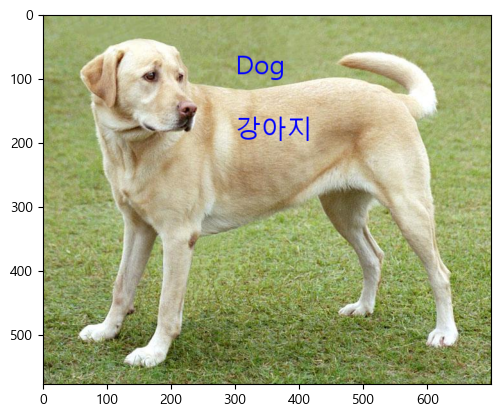

True

In [79]:
from PIL import Image, ImageDraw, ImageFont
img = cv2.imread('data/sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 넘파이 배열
img_pil = Image.fromarray(img)  # 넘파이 배열 -> Image 클래스 타입 객체로 변환
draw = ImageDraw.Draw(img_pil)  # 이미지에 글씨를 draw하는 객체
font = ImageFont.truetype('malgun.ttf', 40)

# text 추가
draw.text((300, 50), 'Dog', font=font, fill=(255, 0, 0))
draw.text((300, 150), '강아지', font=font, fill=(255, 0, 0))

img = np.array(img_pil)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('data/openCV/sample.jpg', img)